# COMP 755

Plan for today

1. Principal Component Analysis (PCA)
2. Eigen-decomposition and Singular Value Decomposition (SVD)
3. Partial Correlation and Partial Least Squares

$$
\renewcommand{\vvec}[2]{\left[ \begin{array}{c} \mathbf{#1}\\ \mathbf{#2} \end{array}\right]}
\renewcommand{\mmat}[4]{\left[ \begin{array}{cc} \mathbf{#1}&\mathbf{#2}\\ \mathbf{#3}&\mathbf{#4} \end{array}\right]}
\renewcommand{\aaa}{\mathbf{a}}
\renewcommand{\AAA}{\mathbf{A}}
\renewcommand{\xyvec}{\left[ \begin{array}{c} \xx\\\yy \end{array} \right]}
\renewcommand{\xyvecc}{\left[ \begin{array}{c} x^1\\y^1 \end{array} \right]}
\renewcommand{\mm}{\mathbf{m}}
\renewcommand{\xx}{\mathbf{x}}
\renewcommand{\yy}{\mathbf{y}}
\renewcommand{\zz}{\mathbf{z}}
\renewcommand{\vv}{\mathbf{v}}
\renewcommand{\ee}{\mathbf{e}}
\renewcommand{\ww}{\mathbf{w}}
\renewcommand{\XX}{\mathbf{X}}
\renewcommand{\WW}{\mathbf{W}}
\renewcommand{\VV}{\mathbf{V}}
\renewcommand{\DD}{\mathbf{D}}
\renewcommand{\dd}{\mathbf{d}}
\renewcommand{\ZZ}{\mathbf{Z}}
\renewcommand{\CC}{\mathbf{C}}
\renewcommand{\bbeta}{\boldsymbol{\mathbf{\beta}}}
\renewcommand{\mmu}{\boldsymbol{\mathbf{\mu}}}
\renewcommand{\ssigma}{\boldsymbol{\mathbf{\sigma}}}
\renewcommand{\reals}{\mathbb{R}}
\renewcommand{\loglik}{\mathcal{LL}}
\renewcommand{\penloglik}{\mathcal{PLL}}
\renewcommand{\likelihood}{\mathcal{L}}
\renewcommand{\Data}{\textrm{Data}}
\renewcommand{\given}{ \big| }
\renewcommand{\MLE}{\textrm{MLE}}
\renewcommand{\EE}{\mathbb{E}}
\renewcommand{\KL}{\textrm{KL}}
\renewcommand{\Bound}{\mathcal{B}}
\renewcommand{\tth}{\textrm{th}}
\renewcommand{\Gaussian}[2]{\mathcal{N}\left(#1,#2\right)}
\renewcommand{\norm}[1]{\left\lVert#1\right\rVert}
\renewcommand{\ones}{\mathbf{1}}
\renewcommand{\corr}[2]{\textrm{corr}(#1,#2)}
\renewcommand{\diag}[1]{\textrm{diag}\left( #1 \right)}
\renewcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\renewcommand{\myexp}[1]{\exp\left\{#1\right\}}
\renewcommand{\mylog}[1]{\log\left\{#1\right\}}
\renewcommand{\argmax}{\mathop{\textrm{argmax}}}
\renewcommand{\new}{\textrm{new}}
\renewcommand{\old}{\textrm{old}}
\renewcommand{\bb}{\mathbf{b}}
\renewcommand{\ba}{\mathbf{a}}
\renewcommand{\BB}{\mathbf{B}}
\renewcommand{\BA}{\mathbf{A}}
\renewcommand{\BC}{\mathbf{C}}
\renewcommand{\UU}{\mathbf{U}}
\renewcommand{\uu}{\mathbf{u}}
\renewcommand{\SSS}{\mathbf{S}}
\renewcommand{\tr}[1]{\textrm{tr}\left\{#1\right\}}
$$

Samples:  1288 Height:  62 Width:  47 Features (Height*Width): 2914
Size of Data (features,samples):  (2914, 1288)


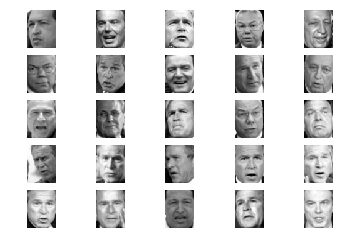

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, data_home='.')
T, h, w = lfw_people.images.shape
print ("Samples: ",T,"Height: ",h,"Width: ",w,"Features (Height*Width):",h*w)
X = lfw_people.data
L= 25
data = X.reshape((T,h*w)).transpose()
print ("Size of Data (features,samples): ", data.shape)   
def show(x):
    plt.imshow(x,cmap=plt.cm.gray)
    plt.axis('off')

for i in range(25):
    plt.subplot(5,5,i+1)
    show(data[:,i].reshape(h,w))
    
    

Data size (features,samples): (2914, 1288)
Mean size: (2914,)
Covariance size: (2914, 2914)
Size of matrix of principal components (features,L): (2914, 25)


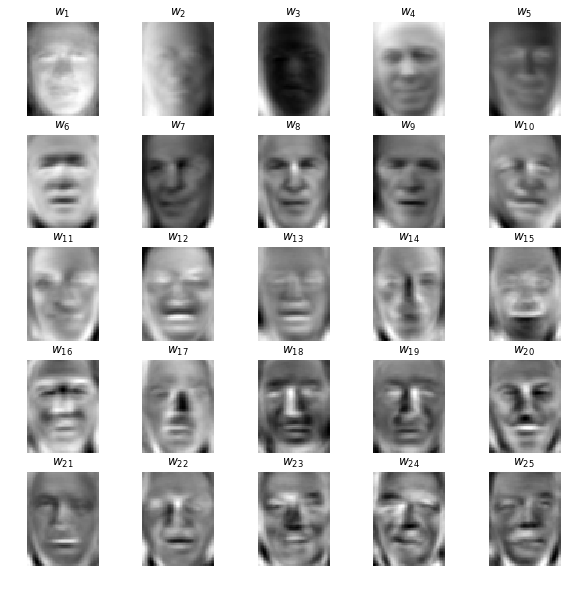

In [5]:
def pca(X,L):
    print ("Data size (features,samples):", X.shape)
    T = X.shape[1]
    mu = np.mean(X,axis=1)
    print ("Mean size:", mu.shape)
    X = X - mu[:,np.newaxis]
    C = 1./float(T)*np.dot(X,X.T)
    print ("Covariance size:", C.shape)
    evals,evecs = np.linalg.eig(C,)
    W = evecs[:,:L]
    z = np.dot(W.T,X)
    return W,z,mu,evals

def project(x,mu,W):
    z = np.dot(x - mu,W)
    reconstruction = np.dot(W,z) + mu
    return z,reconstruction
    
W,z,mu,evals = pca(data,  L)
print ("Size of matrix of principal components (features,L):", W.shape)
eigenfaces = np.reshape(W,(h,w,L))
plt.figure(figsize=(10,10))
subplot_d = np.sqrt(L)
for i in range(L):    
    plt.subplot(subplot_d,subplot_d,i+1)
    plt.imshow(eigenfaces[:,:,i],cmap=plt.cm.gray)
    plt.title('$w_{'+str(i+1)+'}$')
    plt.axis('off')

Size of data sample:  (2914,)
Size of z:  (25,)
Compression rate:  116.56
Size of reconstruction:  (2914,)


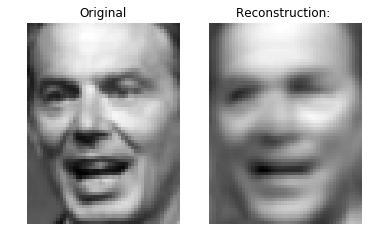

In [7]:
xt = data[:,1]
print ("Size of data sample: ",xt.shape)
z,reconstruction = project(xt,mu,W)
print ("Size of z: ",z.shape)
print ("Compression rate: ", float(xt.shape[0])/float(z.shape[0]))
print ("Size of reconstruction: ", reconstruction.shape)

plt.subplot(1,2,1)
show(xt.reshape(h,w))
plt.title('Original')
plt.subplot(1,2,2)
show(reconstruction.reshape(h,w))
plt.title('Reconstruction: ');


# Principal Component Analysis

Principal Component Analysis optimizes objective
$$
J(\WW,\ZZ) = \frac{1}{N} \sum_{t=1}^N \underbrace{\norm{\xx_t - \WW\zz_t}^2}_{\textrm{reconstruction error}}
$$ to find optimal $\WW$ of size $d\times L$ and $\zz_t$ vectors of length $l$.

Intuitively, reconstruction $\WW\zz_t$ approximates $\xx_t$.

Optimal solutions for $\WW$ and $\zz_t$ are given by: 
1. $\WW^*$ composed of top $L$ eigenvectors of data covariance matrix
2. $\zz^*_t$ is projection of $\xx_t$ onto space spanned by columns of $\WW^*$


# Principal Component Analysis -- implementation details 

Given $\Data = \{\xx_t : t=1,...T\}$, where samples $\xx_t$ are d-long vectors, if you want to learn how to compress these vectors into shorter $L$ long representations $\zz_t$ 
1. compute covariance of the dataset 
  1. centered data : $\hat{\Sigma} = \frac{1}{N} \sum_{t=1}^N\xx_t\xx_t^T$, 
  1. non-centered data: $\hat{\Sigma} = \frac{1}{N} \sum_{t=1}^N(\xx_t - \mmu)(\xx_t^T - \mmu)$, where $\mmu = \frac{1}{N}\sum_t \xx_t$, 
2. extract top L eigenvectors of $\hat{\Sigma}$ and store them in $\WW^*$
3. project data to the space spanned by those eigenvectors  
    1. centered data: $\zz^*_t = (\WW^*)^T\xx_t$
    2. non-centered data: $\zz^*_t = (\WW^*)^T(\xx_t - \mmu) + \mmu$


In [8]:
def pca(X,L):    
    T = X.shape[1]
    mu = np.mean(X,axis=1)    
    X = X - mu[:,np.newaxis]
    C = 1./float(T)*np.dot(X,X.T)    
    evals,evecs = np.linalg.eig(C)
    W = evecs[:,:L]
    z = np.dot(X.T,W)
    return W,z,mu,evals


# Projection onto an orthonormal basis is easy
$$ 
 J(\WW,\ZZ) = \frac{1}{N} \sum_{t=1}^N \underbrace{\norm{\xx_t - \WW\zz_t}^2}_{\textrm{reconstruction error}}
$$
Finding optimal $\zz_t$ is really just regression onto $\WW$
$$
 \norm{\xx_t - \WW\zz_t}^2
$$ but we also know that $\WW$ is orthonormal, $\WW^T\WW = I$


If you take gradient in matrix form and equate it to zero vector

\begin{eqnarray*}
(\xx_t - \WW\zz)^T\WW &=& 0 \\
\xx_t^T\WW - \zz_t^T\underbrace{\WW^T\WW}_{I} &=& 0 \\
\xx_t^T\WW - \zz_t^T &=& 0 \\
\zz_t &=& \WW^T\xx_t\\
\end{eqnarray*}

Hence, if you are minimizing
$$
 \norm{\xx_t - \WW\zz_t}^2
$$ and $\WW^T\WW = I$ then
$$
\zz_t = \WW^T\xx_t
$$

In [9]:
def project(x,mu,W):
    z = np.dot(W.T,x - mu[:,np.newaxis])
    reconstruction = np.dot(W,z) + mu[:,np.newaxis]
    return z,reconstruction

# PCA and eigen-decomposition

PCA uses eigen-decomposition of covariance of a centered data matrix
$$
\frac{1}{N}\XX\XX^T = \hat{\Sigma} = \VV\diag{\dd}\VV^T
$$
where eigenvectors are columns of $\VV$ and $\dd$ is a vector of eigenvalues (eigenvector $\vv_i$ corresponds to eigenvalue $d_i$)

However, we do not need all of the eigenvectors -- we just need the top $L$ of them.

Efficient methods to compute top $L$ eigenvectors exist. They use *Lanczos* power method.



# Power method for computing top eigenvector

To obtain top eigenvector of matrix $\AAA$, start with a randomly generated vector $\bb^{(0)}$ and iterate

\begin{eqnarray*}
\bb^{(k+1)} &=& \frac{\AAA\bb^{(k)}}{\norm{\AAA\bb^{(k)}}}\\
\end{eqnarray*}

The way to think about this is:

\begin{eqnarray*}
\AAA\bb^{(k)} &=& \frac{1}{C_k}(\VV\DD\VV^T)^k\bb^{(0)} = \frac{1}{C_k}\VV\DD^k\VV^T\bb^{(0)} \\
&=& \frac{1}{C_k}\VV\diag{\dd^k}\VV^T\bb^{(0)} = \sum_i  \frac{d_i^k}{C_k}\vv_i\left(\vv_i^T\bb^{(0)}\right)
\end{eqnarray*}

Note that $(\frac{\dd_{j}}{\dd_1})^k$, for $j>1$ tends to 0 as $k$ grows, hence contribution from $\vv_1$ gets proportionally larger. 

More sophisticated methods based on Lanczos method.

[[-0.22590363  0.23195047 -0.03786408  0.37374716 -0.05109231 -0.40041844
  -0.11526983 -0.06139302 -0.24907054  0.27717813 -0.15557454 -0.20383893
   0.01677933 -0.19183472 -0.34136459  0.15406141  0.05169526  0.05617754
   0.39262341  0.17916044]]
[-0.22590443  0.23195115 -0.0378667   0.37374746 -0.05109332 -0.40042063
 -0.11526652 -0.06139742 -0.24906632  0.27717669 -0.15557383 -0.20384345
  0.01678263 -0.19183597 -0.3413595   0.15406124  0.05170373  0.05617577
  0.39262511  0.17915895]


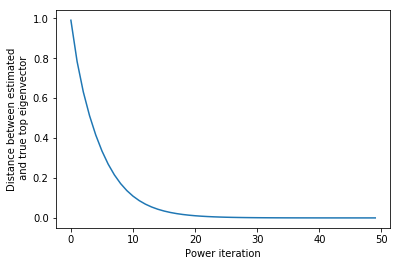

In [11]:
np.random.seed(1)
A = np.random.randn(20,20)
S = np.dot(A.transpose(),A)
evals,evecs = np.linalg.eig(S)
dist = []
v = np.random.randn(20,1)
for i in range(50):
    pv = v
    t = np.dot(S,v)
    v = t/np.linalg.norm(t)  
    dist.append(np.min([np.linalg.norm(v.T-evecs[:,0]),np.linalg.norm(v.T+evecs[:,0])]))
plt.plot(dist)
plt.xlabel('Power iteration')
plt.ylabel('Distance between estimated\n and true top eigenvector')
print (v.T)
print (evecs[:,0])

# Using Singular Vector Decomposition to compute PCA

Even with power methods, we still need to compute the covariance matrix. 

This matrix is of size $d \times d$ ($2914 \times 2914$ in our faces example). This can be expensive.

We will now see how to bypass computation of covariance matrix using a different decomposition.

For brevity, we will assume centered data, so the covariance is given by:
$$
\hat{\Sigma} = \frac{1}{N} \XX\XX^T
$$



# Singular Vector Decomposition 

Frequently used in machine learning as a means to reduce computation time.

Let $\XX$ be a matrix of size $d \times N$ and $K = \min(d,N)$ then we can find decomposition 

$$
\XX = \UU \SSS \VV^T
$$

where $\UU: d \times K$ and $\VV: K \times N$ are orthonormal and $\SSS: K \times K$ is diagonal.

These matrices have their names
1. columns of $\UU$ left singular vectors
2. diagonal of $\SSS$ contains singular values
3. columns of $\VV$ right signular vectors

# Singular Vector Decomposition 

$$
\XX = \UU \SSS \VV^T
$$
Why is this useful?

Remember we want to compute eigenvectors of covariance matrix

\begin{eqnarray*}
\XX\XX^T &=& (\UU \SSS \VV^T)(\UU \SSS \VV^T)^T \\
&=& \UU \SSS \underbrace{\VV^T\VV}_{I} \SSS^T \UU^T \\
&=& \UU\SSS\SSS^T\UU^T = \UU\SSS^2\UU^T
\end{eqnarray*}

Hence,
1. left singular vector of $\XX$, $\UU$ are eigenvectors of $\XX\XX^T$
2. right singular vector of $\XX$, $\VV$ are eigenvectors of $\XX^T\XX$

Importantly, computation of top $k$ singular values can be accomplished in $O(dN\log(k))$ time.

# Singular Vector Decomposition and low-rank representation

Low-rank representation of a matrix is obtained by using only $k$ top singular vectors

1. Full rank uses all singular vectors (1..K):

$$
\XX = \sum_{i=1}^k \uu_is_i\vv_i^T  + \sum_{i=k+1}^K \uu_is_i\vv_i^T
$$

2. Low rank approximation

$$
\hat{\XX} = \sum_{i=1}^k \uu_is_i\vv_i^T
$$

![](lowrank.png)

# Model selection for subspace models

Since the subspace models are unsupervised there is no labeling available to evaluate test error.

However, we can evaluate reconstruction error (negative log-likelihood) on a held out validation set.





In [13]:
from sklearn.decomposition import TruncatedSVD

def pca(X,L):
    print ("Data size (features,samples):", X.shape)
    T = X.shape[1]
    mu = np.mean(X,axis=1)
    print ("Mean size:", mu.shape)
    X = X - mu[:,np.newaxis]
    C = 1./float(T)*np.dot(X,X.T)
    print ("Covariance size:", C.shape)
    evals,evecs = np.linalg.eig(C,)
    W = evecs[:,:L]
    z = np.dot(W.T,X)
    return W,z,mu,evals

from sklearn.cross_validation import train_test_split
print (data.shape)
X_train, X_test = train_test_split(X,  test_size=0.75, random_state=1)
X_train = X_train.T
X_test = X_test.T
n_test = X_test.shape[1]

W,_,mu,evals = pca(X_train,200)
    

/Users/jgs/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(2914, 1288)
Data size (features,samples): (2914, 322)
Mean size: (2914,)
Covariance size: (2914, 2914)


5 258536.660935
6 123849.620199
7 31704.1006288
8 2009500.95888
9 1913703.4588
10 1233100.63248
11 1735587.44837
12 1831167.25135
13 2079809.2403
14 1868607.45403
15 1609051.30575
16 1362993.46202
17 1461486.02011
18 1104221.42485
19 1508481.81866
20 1318684.42445
21 929273.800391
22 927974.01384
23 991649.784732
24 976703.119252
25 728526.444532
26 252.881516735
27 26.5800277204
28 9312.41559047
29 114817.117593
30 105030.055355
31 178246.973554
32 176435.952599
33 196372.990799
34 396685.915579
35 142212.060521
36 175532.843522
37 153981.823665
38 154424.030731
39 197259.475947
40 363651.30777
41 162681.132346
42 136204.441427
43 150392.411962
44 148599.214754
45 226541.77006
46 276996.683808
47 222499.272912
48 272817.24225
49 281058.525086
50 260561.723683
51 245882.182782
52 215489.020166
53 189823.524368
54 193356.029056
55 109870.086838
56 46976.7605798
57 105659.295659
58 103610.349172
59 101202.93818
60 101816.915556
61 107725.374924
62 109063.550093
63 110202.194828
64 98938.

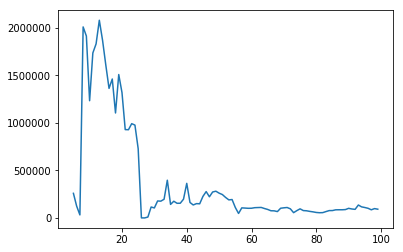

In [16]:
err = []
for L in range(5,100):
    _,reconstruction = project(X_test,mu,W[:,:L])
    residual = X_test - reconstruction
    err.append(1.0/n_test*np.sum(np.sum(residual)**2.0))
    print (str(L),str(err[-1]))
plt.plot(range(5,100),err)

# Correlation 

Correlation of two vectors 

$$
\corr{\xx}{\yy} = \sum_{j=1}^N \frac{x_j - \mu_x}{s_x}\frac{y_j - \mu_y}{s_y}
$$

where $\mu_x = \frac{1}{N}\sum_j x_j$, $\mu_y = \frac{1}{N}\sum_j y_j$, $s_x = \sqrt{(\sum_j x_j - \mu_x)^2}$, $s_y = \sqrt{(\sum_j y_j - \mu_y)^2}$

Complicated!


Let's assume that $\xx$ and $\yy$ are centered, means are 0. Further, assume that norm of $\xx$ and $\yy$ are 1.

More compactly: $\mu_x = \mu_y = 0$ and $s_x = s_y = 1$. 


Then correlation is

$$
\corr{\xx}{\yy} = \xx^T\yy
$$

Also
$$
\corr{\xx}{\yy} = \xx^T\yy = \cos(\textrm{angle}(\xx,\yy))
$$

So, here are couple of observations about correlation:
1. Correlation between normalized vectors is equivalent to cosine of angle between them
2. Orthonormal vectors have pairwise correlation of 0.



# Problems with correlation

Correlation only tells you about a **linear** relationship between **two** variables.

However, the correlation between two variables may arise due to a third variable.

For example
1. eye-sight gets worse with age
2. hair becomes gray with age

Correlation between eye-sight test and number of gray hairs may suggest that one drives the other.
But we know that age is the cause of both.

Common saying "Correlation does not imply causation" reflects the idea that the correlation might arise to a shared cause. 

So, how do we fix correlation to account for additional factors?

# Partial correlation

**Partial correlation** asks whether two variables are correlated after we remove effects of a third

If we fit model:

\begin{eqnarray*}
x &=& \beta_x \zz + r_x \\
y &=& \beta_y \zz + r_y \\
r_x &\sim& \mathcal{N}(\mu_x,\sigma_x^2) \\
r_y &\sim& \mathcal{N}(\mu_y,\sigma_y^2) \\
\end{eqnarray*}

then we can ask how correlated are $\xx - \beta_x \zz$ and $\yy - \beta_y \zz$.



# Today

1. PCA in greter detail
2. Power methods
3. SVD and low-rank representations
4. Model selection for PCA
5. Correlation and partial correlation